# 4. Filtering - 필터링

<hr>

## 1) Understanding to filtering - 필터링 이해하기
<hr>

- 영상의 필터링(Image filtering)
    - 영상에서 필요한 정보만 통과시키고 원치 않는 정보는 걸러내는 작업
<hr>

- 주파수 공간에서의 필터링(Frequency domain filtering)
    - 저주파 성분 : 부드러운 성분
    - 고주파 성분 : 픽셀 값이 급격하게 자주 바뀌는 성분
    - (i.e.) OpenCV 에서는 기본적으로 공간적 필터링을 사용하는데, 경우에 따라서 예를 들어 영상의 사이즈나<br>
내가 사용하려는 필터의 크기가 상당히 커질 경우에는 내부에서 주파수 공간에서의 필터링을 자동으로 해준다.
<hr>

- 공간적 필터링(Spatial domain filtering)
    - 영상의 픽셀 값을 직접 이용하는 필터링 방법
        - 대상 좌표의 픽셀 값과 주변 픽셀 값을 동시에 사용
    - 주로 마스크(mask) 연산을 이용함
        - 마스크 = 커널(kernel) = 윈도우(window) = 템플릿(template)
<hr>

- 필터링 : 마스크 연산
    - 다양한 모양과 크기의 마스크를 만들수 있다.
    - 마스크의 형태와 값에 따라 필터의 역할이 결정됨
        - 영상 부드럽게 만들기
        - 영상 날카롭게 만들기
        - 에지(edge) 검출
        - 잡음(noise) 제거
<hr>

- 미스크 연산 수행 과정(3x3 크기의 마스크)
$$Correlation(convolution)\begin{cases}\begin{align}g(x, y) = 
& m(0, 0) · f(x-1, y-1) \\ 
+ & m(1, 0) · f(x, y-1) \\ 
+ & m(2, 0) · f(x+1, y-1) \\ 
+ & m(0, 1) · f(x-1, y) \\ 
+ & m(1, 1) · f(x, y) \\ 
+ & m(2, 1) · f(x+1, y) \\ 
+ & m(0, 2) · f(x-1, y+1) \\ 
+ & m(1, 2) · f(x, y+1) \\ 
+ & m(2, 2) · f(x+1, y+1) \\ 
\end{align}\end{cases}$$
$$g(x, y) = \sum_{j=0}^{2}\sum_{i=0}^{2} m(i, j) · f(x+i-1, y+j-1)$$
- 마스크 연산 수행 과정 일반화
$$Correlation(convolution)\begin{cases}\begin{align}g(x, y) = 
& m(0, 0) · f(x-\frac{n}{2}, y-\frac{n}{2}) \\ 
\vdots \\ 
+ & m(n, n) · f(x+\frac{n}{2}, y+\frac{n}{2}) \\
\end{align}\end{cases}$$
$$g(x, y) = \sum_{j=0}^{n}\sum_{i=0}^{n} m(i, j) · f(x+i-\frac{n}{2}, y+i-\frac{n}{2})$$
<hr>

- 최외곽 픽셀 처리
    - 최외곽 바깥에 가상의 픽셀이 있다고 가정
<hr>

- OpenCV 필터링에서 지원하는 가장자리 픽셀 확장 방법

|Border Types 열거형 상수|설명|
|:-|:-|
|BORDER_CONSTANT|최외곽 바깥을 0으로 확장|
|BORDER_REPLICATE|최외곽 바깥을 모두 최외곽 값으로 확장|
|BORDER_REFLECT|최외곽 바깥을 최외곽 값부터 안쪽으로 확장이 필요한 만큼까지의 값을 대칭으로 넘겨서 확장|
|BORDER_REPLECT_101|최외곽 바깥을 최외곽 바로 이전의 값부터 안쪽으로 확장이 팔요한 만큼까지의 값을 대칭으로 넘겨서 확장|
|BORDER_REFLECT101|BORDER_REPLECT_101과 같음|
|BORDER_DEFAULT|BORDER_REPLECT_101과 같음|
<hr>

> `기본적인 2D 필터링 함수`
$$\mathsf{{\color{RoyalBlue}cv2.}{\color{Tan}filter2D}(src, ddepth, kernel, dst, anchor, delta, borderType) -> dst}$$
- src : source. 입력 영상
- ddepth : desired depth. 출력 영상 데이터 타입. (e.g.) cv2.CV_8U, cv2.CV_32F, cv2.CV_64F<br>
-1을 지정하면 src와 같은 타입의 dst 영상을 생성한다.<br>
(i.e.) uint8, float32와 같은 데이터 자료형은 numpy에서 사용하는 데이터 타입이기 때문에<br>
출력하려는 데이터 타입에 따라 그에 맞는 플래그 상수를 선언해줘야 한다.
- kernel : corr kernel or conv kernel. 실수형의 필터 마스크 행렬.<br>
(i.g.) 일반적으로 3x3, 5x5크기의 필터 마스크 행렬을 주로 사용한다.
- anchor : 고정점 위치. (-1, -1)이면 필터 중앙을 고정점으로 사용한다.
- delta : 추가적으로 더할 값
- borderType : 가장자리 픽셀 확장 방식
- dst : 출력 영상
- 참고사항
    - cv2.filter2D() 함수는 실제로 convolution(합성곱)이 아닌 correlation(상관 관계)를 계산한다.
    - 두 개의 용어가 혼용되어 사용되지만 정확하게는 convolution이 아닌 correlation임에 주목.

In [ ]:
import cv2
help(cv2.filter2D)

## 2) Blurring (1) : Mean filter - 블러링 (1) : 평균값 필터
<hr>

- 평균값 필터(Mean filter)
    - 영상의 특정 좌표 값을 주변 픽셀 값들의 산술 평균으로 설정한다.
    - 픽셀들 간의 그레이스케일 값 변화가 줄어들어 날카로운 에지가 무뎌지고,<br>
영상에 있는 잡음의 영샹이 사라지는 효과
    - 마스크의 크기가 커질수록 평균값 필터 결과가 더욱 부드러워지지만 더 많은 연산량이 필요하다.
<hr>

> `평균값 필터링 함수`
$$\mathsf{{\color{RoyalBlue}cv2}{\color{Tan}blur}(src, ksize, dst, anchor, borderType) -> dst}$$
- src : source. 입력 영상
- ksize : kernel size. 평균값 필터 크기. (width, height) 형태의 튜플
- anchor : 고정점 위치. (-1, -1)이면 필터 중앙을 고정점으로 사용한다.
- borderType : 가장자리 픽셀 확장 방식
- dst : destination. 결과 영상. 입력 영상과 같은 크기 & 같은 타입
$$kernel = \frac{1}{ksize.width\times ksize.height}$$

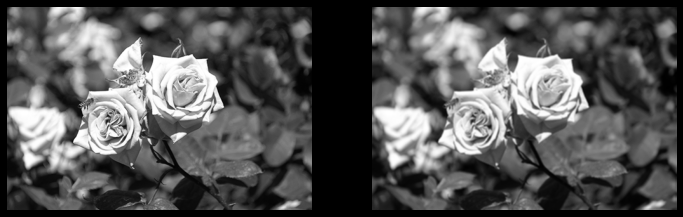

-1

In [3]:
### Practice mean filtering using cv2.filter2D() function
import cv2
import matplotlib.pyplot as plt
import numpy as np

src = cv2.imread("./images/rose.bmp", cv2.IMREAD_GRAYSCALE)  # Load image as grayscale

kernel = np.array([[1/9, 1/9, 1/9],
                   [1/9, 1/9, 1/9],
                   [1/9, 1/9, 1/9]])

dst = cv2.filter2D(src, -1, kernel)

## Output with pyplot
plt.figure(figsize=(12, 6))  # Set plot size
plt.subplot(121), plt.axis("off"), plt.imshow(src, "gray")
plt.subplot(122), plt.axis("off"), plt.imshow(dst, "gray")
plt.show()

## Output with opencv window
cv2.imshow("Original", src)
cv2.imshow("Mean filter", dst)
cv2.waitKey()
cv2.destroyAllWindows()
cv2.waitKey(1)

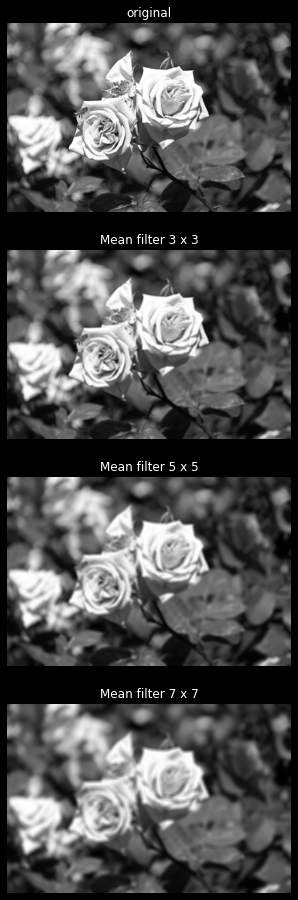

In [155]:
### Practice the mean filtering using kernel of diverse sizes
import cv2
import matplotlib.pyplot as plt
import numpy as np

src = cv2.imread("./images/rose.bmp", cv2.IMREAD_GRAYSCALE)  # Load image as grayscale

## Output with pyplot
plt.figure(figsize=(6, 16))
plt.subplot(411)
plt.axis("off")
plt.title("original")
plt.imshow(src, "gray")

for index, ksize in enumerate([3, 5, 7]):
    dst = cv2.blur(src, (ksize, ksize))
    plt.subplot(4, 1, index + 2)
    plt.axis("off")
    plt.title(f"Mean filter {ksize} x {ksize}")
    plt.imshow(dst, "gray")
plt.show()

## Output with opencv window
# cv2.imshow("original", src)
# for ksize in [3, 5, 7]:
#     dst = cv2.blur(src, (ksize, ksize))
#     desc = f"Mean : {ksize} x {ksize}"
#     cv2.putText(img = dst,
#                 text = desc,
#                 org = (10, 30),  # (x, y)
#                 fontFace = cv2.FONT_HERSHEY_SIMPLEX,
#                 fontScale = 1.0,
#                 color = 255,  # white
#                 thickness = 1,
#                 lineType = cv2.LINE_AA  # Anti-Aliasing
#                 )
#     cv2.imshow("Mean filter", dst)
#     cv2.waitKey()

# cv2.destroyAllWindows()
# cv2.waitKey(1)

## 3) Blurring (2) : Gaussian filter - 블러링 (2) : 가우시안 필터
<hr>

- 평균값 필터에 의한 블러링의 단점
    - 필터링 대상 위치에서 가까이 있는 픽셀과 멀리 있는 픽셀이 모두 같은 가중치를 사용하여 평균을 계산
    - 멀리 있는 픽셀의 영향을 많이 맏을 수 있다.
- 평균값 필터와 가우시안 필터 비교
    - 평균값 필터 : 가까운 픽셀과 멀리 있는 픽셀이 같은 가중치를 사용하여 평균 계산
    - 가우시안 필터 : 가까운 픽셀은 큰 가중치를, 멀리 있는 픽셀은 작은 가중치를 사용하여 평균 계산
<hr>

- (1차원) 가우시안 함수 (Gaussian function)
$$G_{\mu,\sigma}(x) = \frac{1}{\sqrt{2\pi\sigma}}e^{-\frac{(x-\mu)^2}{2\sigma^2}}$$
<hr>

- 가우시안 함수의 특징
<hr>

- (2차원) 가우시안 함수 (Gaussian function)
$$G_\sigma (x, y) = \frac{1}{2\pi \sigma^2} e^{(-\frac{x^2+y^2}{2\sigma^2})}
\begin{cases}
\mu_x = \mu_y = 0 \\ 
\sigma_x = \sigma_y = \sigma
\end{cases}$$
<hr>

- 2차원 가우시안 필터 마스크 (σ = 1.0)
    - 필터 마스크 크기 : `(8σ + 1)` 또는 `(6σ + 1)`
    - OpenCV 에서는 uint8을 사용하는 영상에 대해서는 `(6σ + 1)`을,
    - float 타입은 `(8σ + 1)`정도의 가우시안 필터를 만들어 사용한다.
<hr>

> `가우시안 필터링 함수`
$$\mathsf{{\color{RoyalBlue}cv2.}{\color{Tan}GaussianBlur}(src, ksize, sigmaX, dst, sigmaY, borderType) -> dst}$$
- src : source. 입력 영상. 각 채널 별로 처리된다.
- dst : destination. 출력 영상. src와 같은 크기, 같은 타입
- ksize : kernel size. 가우시안 필터 크기. (0, 0)을 지정하면 sigma 값에 의해 자동 결정된다.<br>
(i.e.) 가우시안 필터의 크기를 지정할 수도 있는데 만약 관련 연구원이 아니라면 안하는 것을 추천한다.<br>
만약 sigma 값에 적절하지 않게 설정이 된다면 가우시안 함수의 온전한 모습을 사용할 수 없다는 단점이 생긴다.
- sigmaX : x방향 sigma
- sigmaY : y방향 sigma. 0이면 sigmaX와 같게 설정된다.
- borderType : 가장자리 픽셀 확장 방식.

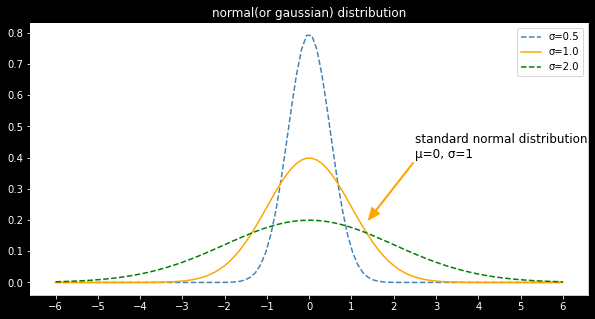

In [256]:
from IPython.display import Image
Image("./images/normal_distribution.png")  # Normal(or Gaussian) distribution

In [262]:
### save gaussian distribution
# import numpy as np
# from scipy.stats import norm

# plt.figure(figsize=(10, 5))
# plt.subplot(facecolor="white", title="normal(or gaussian) distribution")
# plt.xticks(ticks=np.arange(-6, 7, 1))
# colors = ["steelblue", "orange", "green"]
# for sigma, color_ in zip([0.5, 1.0, 2.0], colors):
#     x = np.linspace(-6, 6, 100)
#     y = norm.pdf(x, 0, sigma)
    
#     if sigma == 1.0:
#         plt.plot(x, y, color=color_, label=f"σ={sigma}")
#         continue
#     plt.plot(x, y,"--", color=color_, label=f"σ={sigma}")

# legend = plt.legend(facecolor="white")
# plt.setp(legend.get_texts(), color="black")
# arrowprops_ = {"color":"orange", "width":1, "headwidth":10}
# plt.annotate('standard normal distribution\nμ=0, σ=1',
#              xy=(1.4, 0.2),  # annotate start points
#              xytext=(2.5, 0.4),  # text start points
#              fontsize=12,
#              color="black",  # text color
#              arrowprops=arrowprops_)
# plt.show()

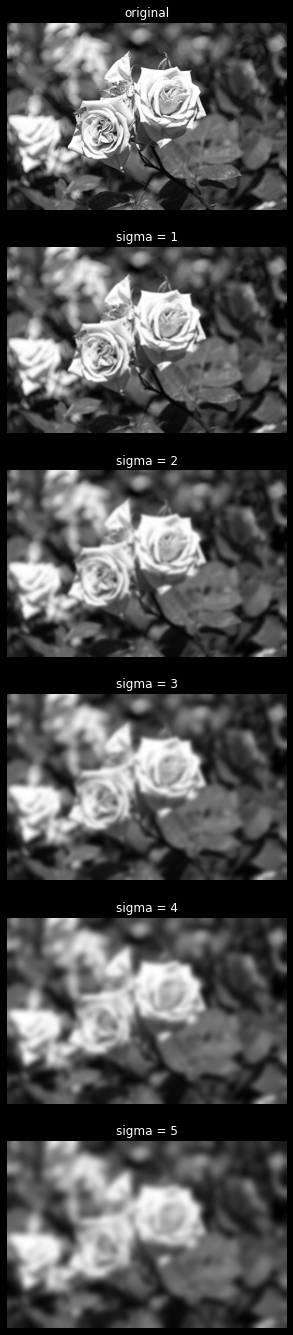

In [261]:
### Gaussian filtering using sigma of diverse size
import cv2
import matplotlib.pyplot as plt

src = cv2.imread("./images/rose.bmp", cv2.IMREAD_GRAYSCALE)  # Load image as grayscale

## Output with pyplot
plt.figure(figsize=(6, 24))
plt.subplot(611, title="original").axis("off")
plt.imshow(src, "gray")
for sigma in range(1, 6):
    dst = cv2.GaussianBlur(src, (0, 0), sigma)
    plt.subplot(6, 1, sigma + 1, title = f"sigma = {sigma}").axis("off")
    plt.imshow(dst, "gray")
plt.show()

## Output with opencv window
cv2.imshow("original", src)
for sigma in range(1, 6):
    dst = cv2.GaussianBlur(src, (0, 0), sigma)
    
    desc = f"sigma = {sigma}"
    cv2.putText(
        img = dst,
        text = desc,
        org =  (10, 30),  # (x, y)
        fontFace = cv2.FONT_HERSHEY_SIMPLEX,
        fontScale = 1.0,
        color  = 255,  # white
        thickness = 1,
        lineType = cv2.LINE_AA  # Anti-Aliasing
        )
    cv2.imshow("destination", dst)
    cv2.waitKey()
cv2.destroyAllWindows()
cv2.waitKey(1)

<hr>

## 4) Sharpning : Unsharp mask filter - 샤프닝 : 언샤프 마스크 필터
<hr>

- 언샤프 마스크(Unsharp mask) 필터링
    - 날카롭지 않은(unsharp) 영상 즉, 부드러워진 영상을 이용하여 날카로운 영상을 생성한다.
<hr>

- 언샤프 마스크 필터 구현하기
    - 샤프닝 정도를 조절할 수 있도록 수식 변경
$$h(x, y) = f(x, y) + \alpha · g(x, y)$$
$$\Downarrow$$
$$\begin{align}h(x, y) & = f(x, y) + \alpha (f(x, y) - \overline{f}(x, y)) \\ 
& = (1 + \alpha)f(x, y) - \alpha · \overline{f}(x, y)\end{align}$$
$$\Downarrow$$
$$h(x, y) = (1 + \alpha)f(x, y) - \alpha · G_\sigma (f(x, y))$$

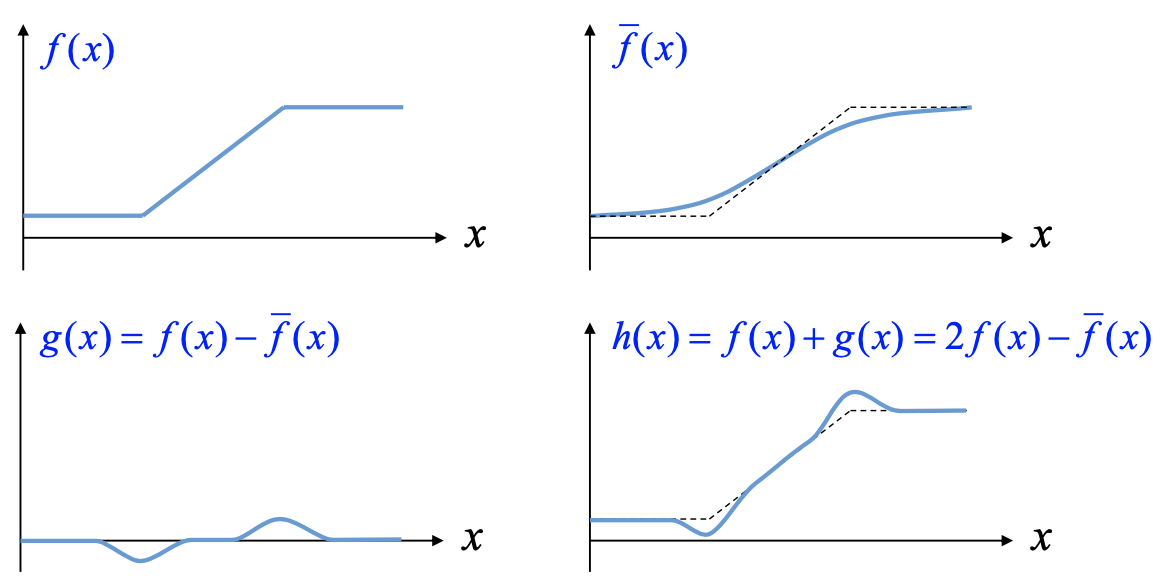

In [263]:
from IPython.display import Image
Image("./images/unsharp_mask_process.png")  # Unsharp mask filtering process

In [4]:
### Unsharp mask implement
import cv2
import matplotlib.pyplot as plt
import numpy as np

src = cv2.imread("./images/rose.bmp", cv2.IMREAD_GRAYSCALE)
src_float = src.astype(np.float32)

blur = cv2.GaussianBlur(src_float, (0, 0), 2.0)
blur2 = cv2.GaussianBlur(src, (0, 0), 2)

dst = np.clip(2. * src_float - blur, 0, 255).astype(np.uint8)
dst2 = np.clip(2 * src - blur, 0, 255)

cv2.imshow("original", src)
cv2.imshow("destination", dst)
cv2.imshow("destination2", dst2)
cv2.waitKey()
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

In [6]:
### Unsharp mask implement about color images
import cv2
import matplotlib.pyplot as plt
import numpy as np
from opencv_supports import *

src = cv2.imread("./images/rose.bmp")
src_YCrCb = cv2.cvtColor(src, cv2.COLOR_BGR2YCrCb)
src_Y_float = src_YCrCb[:, :, 0].astype(np.float32)

blur = cv2.GaussianBlur(src_Y_float, (0, 0), 2.0)
src_YCrCb[:, :, 0] = np.clip(2. * src_Y_float - blur, 0, 255).astype(np.uint8)

dst = cv2.cvtColor(src_YCrCb, cv2.COLOR_YCrCb2BGR)

cv2.imshow("original", src)
cv2.imshow("destination", dst)
close_opencv_window_for_macOS()